In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from tabulate import tabulate

## Performance Predictions

I think the random forest model will perform better than the logistic regression model. First, logistic regression relies on more assumptions than the random forest model. Additionally, the random forest can use the tuning parameter to get better predictions of the loans. Even if the random forest model performs poorly at first, it can be tuned to be more accurate.

## Import and Clean the Data

In [2]:
# Import the data
leading = pd.read_csv('Resources/lending_data.csv')
leading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [3]:
# check null data 
leading.isnull().sum()
# there is no null data

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

## Exploratory Data Analysis

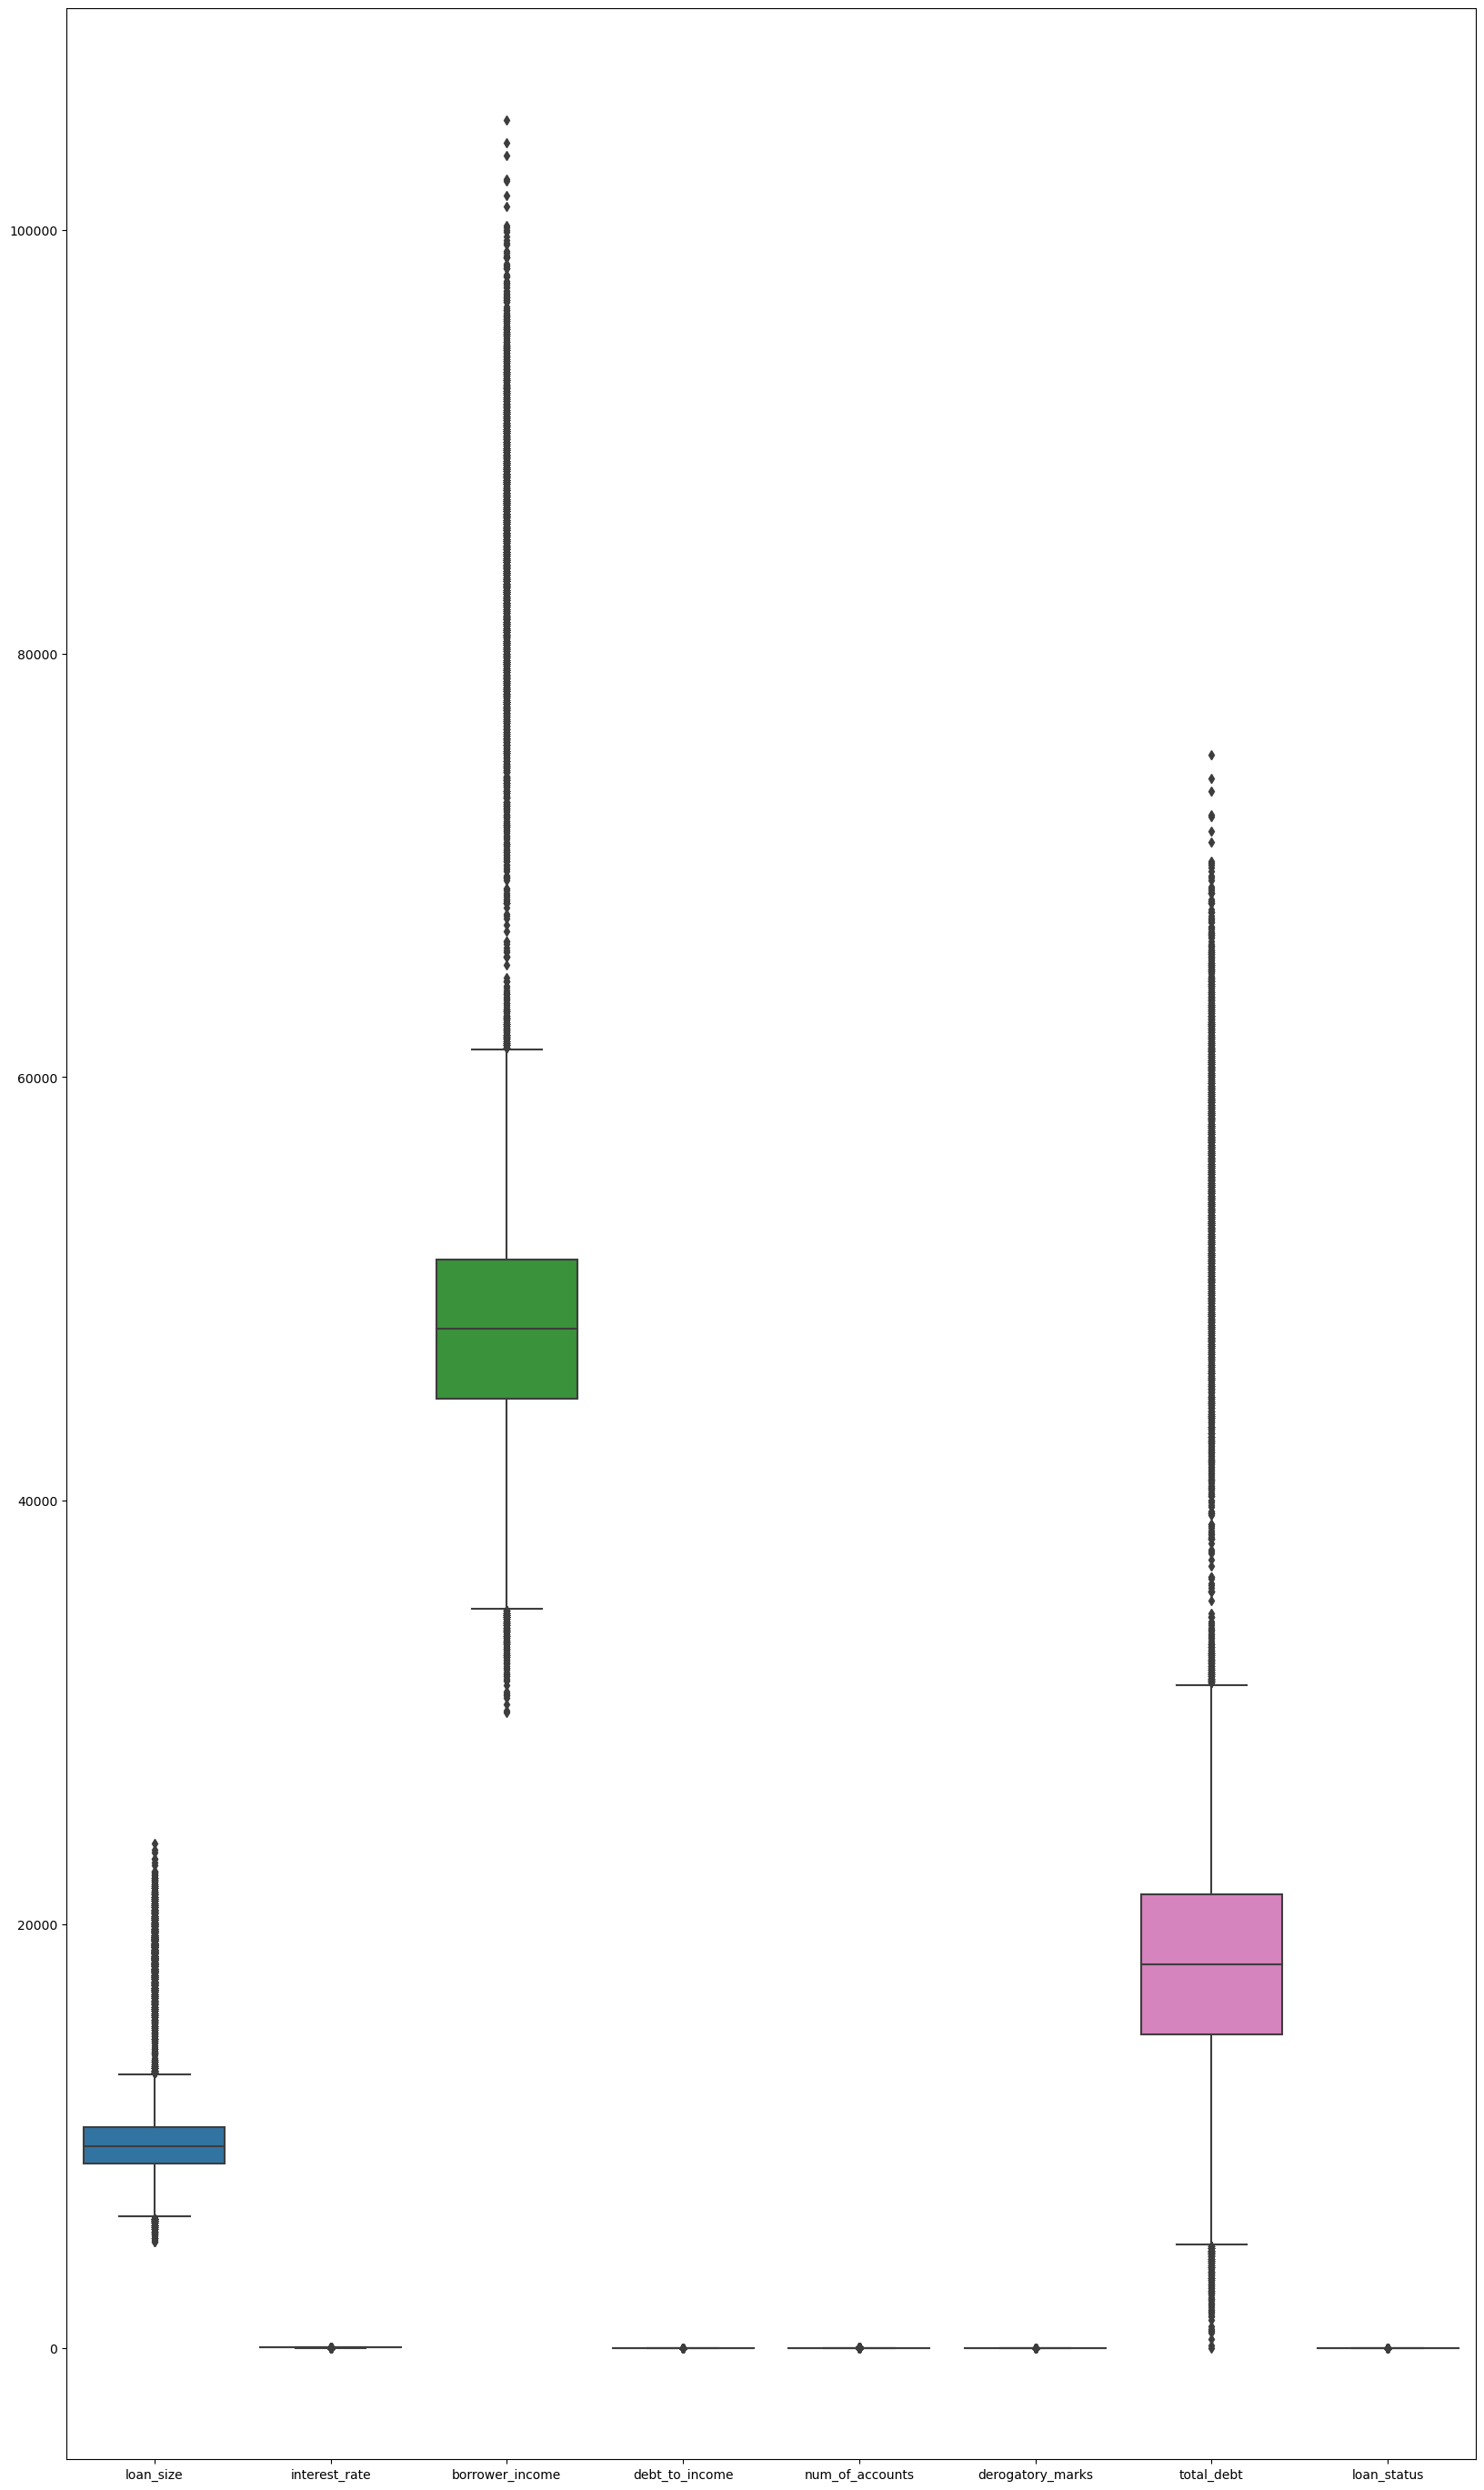

In [4]:
# boxplot 
plt.figure(figsize=(20,35))
sns.boxplot(data=leading)
plt.show()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


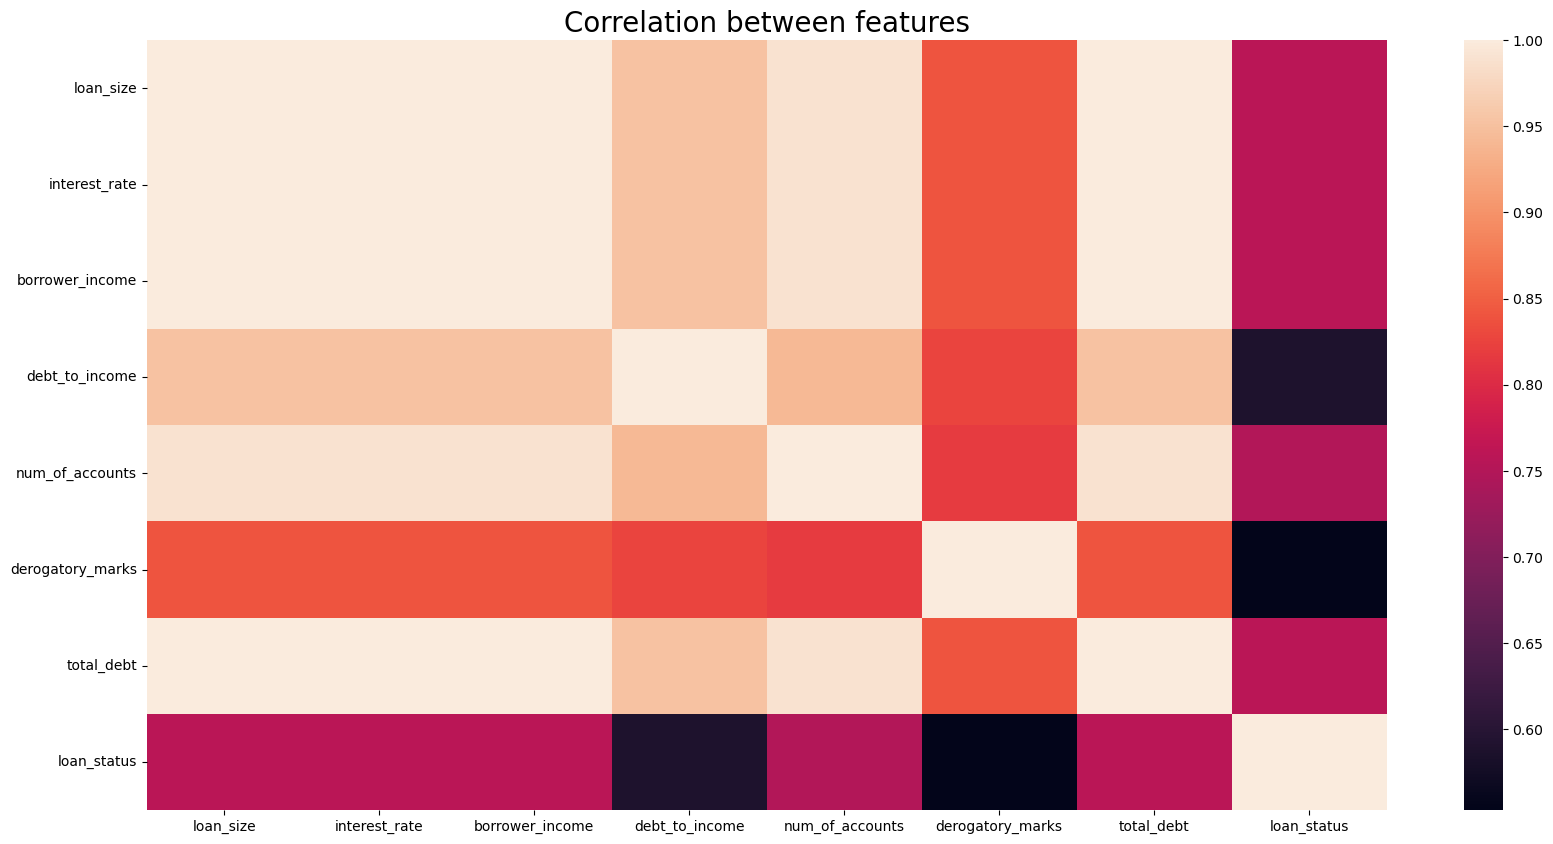

In [5]:
# heatmeap
leading_corr = leading.corr()
plt.figure(figsize=(20,10))
sns.heatmap(leading_corr)
plt.title("Correlation between features", size=20)
leading_corr

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


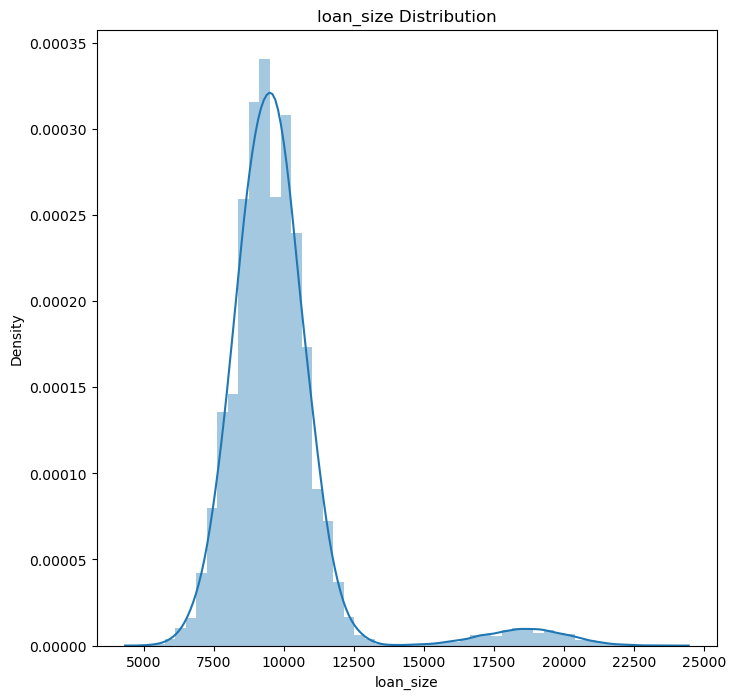

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


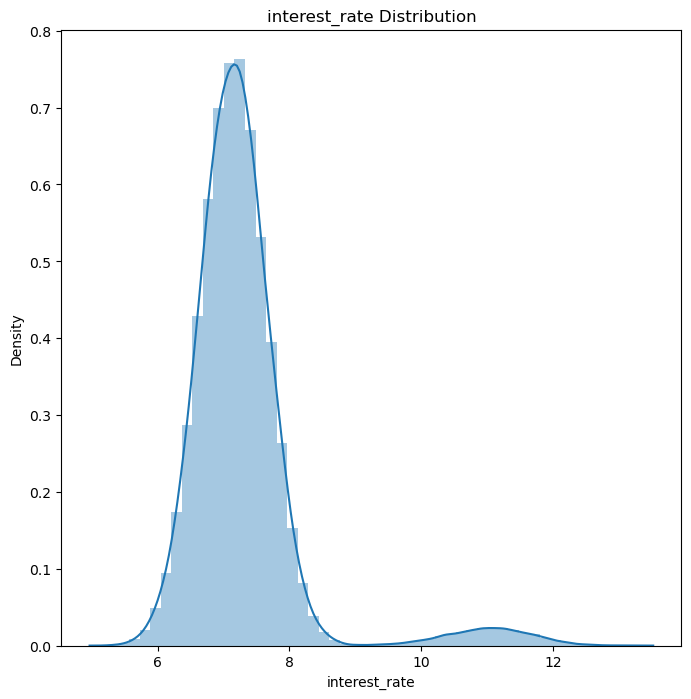

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


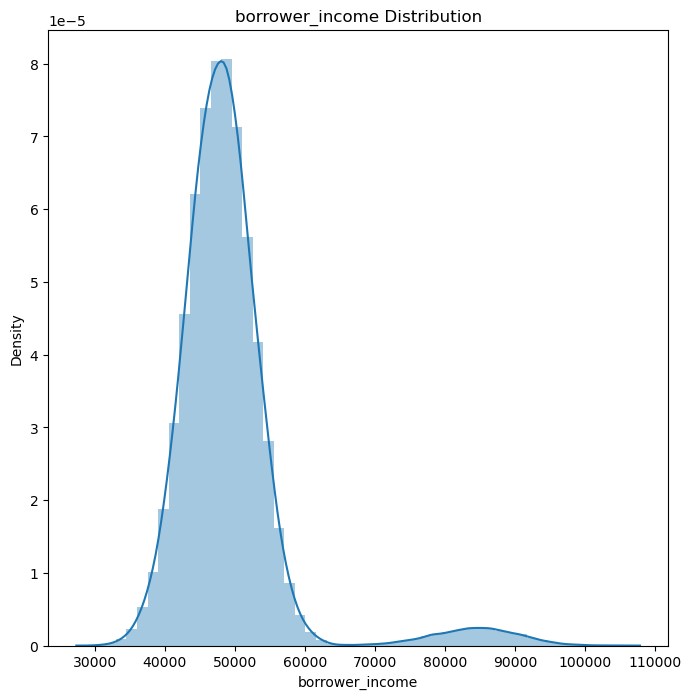

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


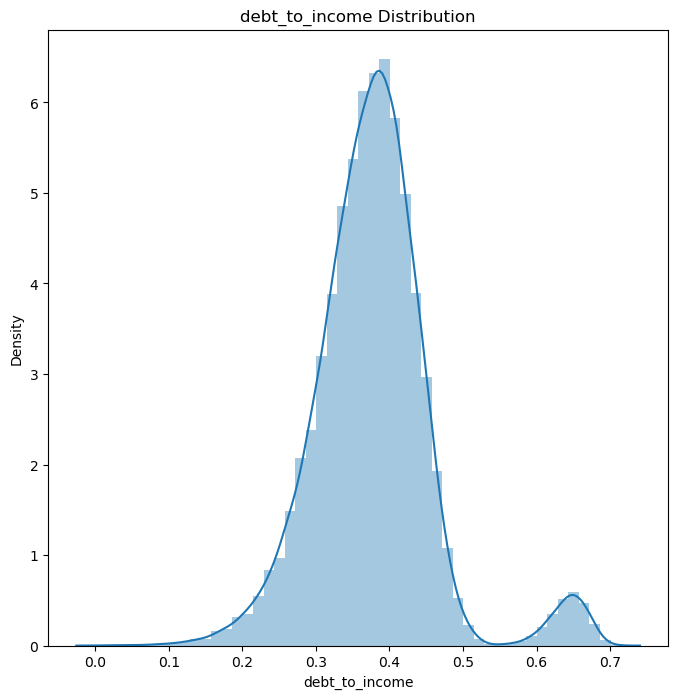

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


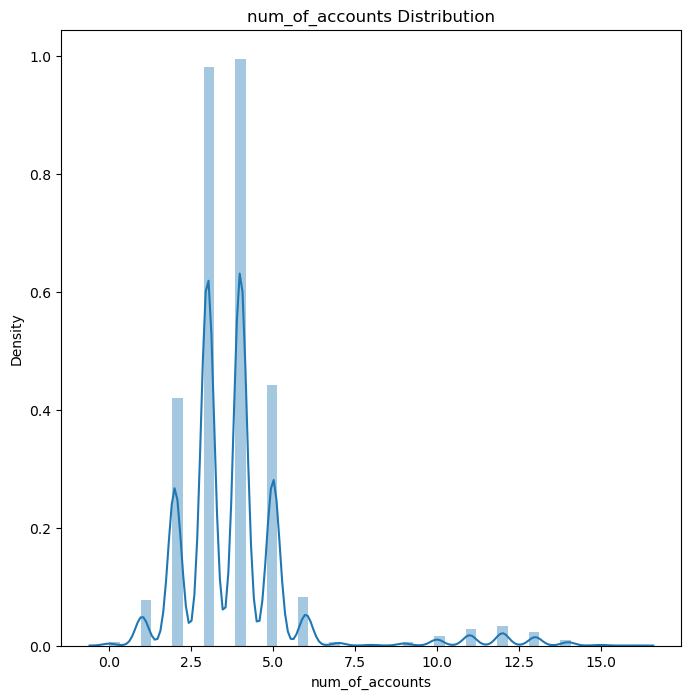

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


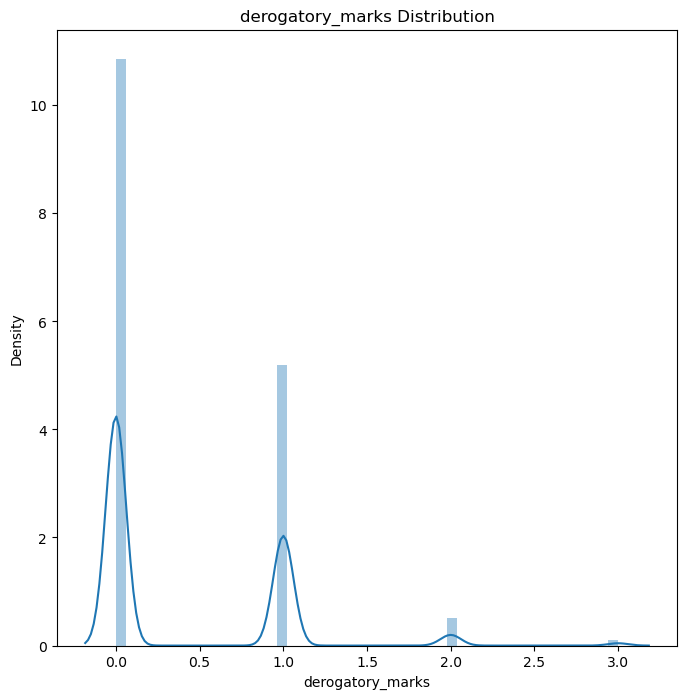

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


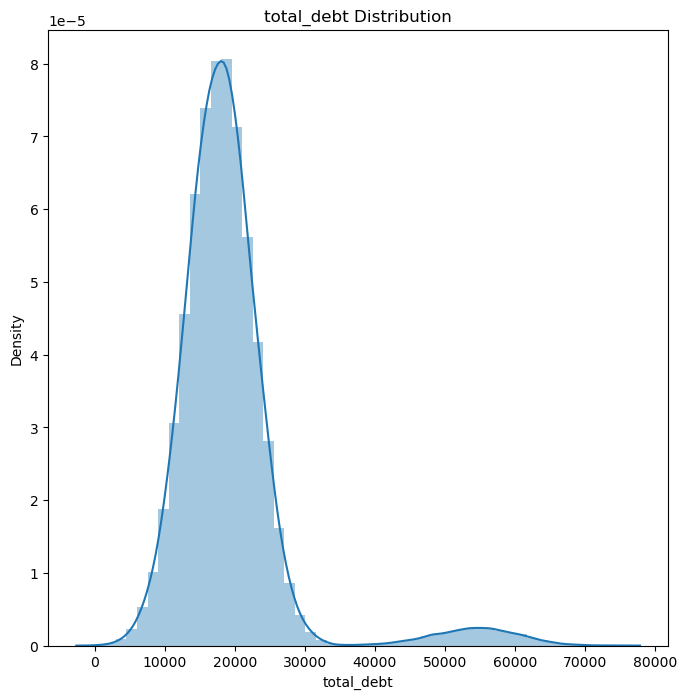

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


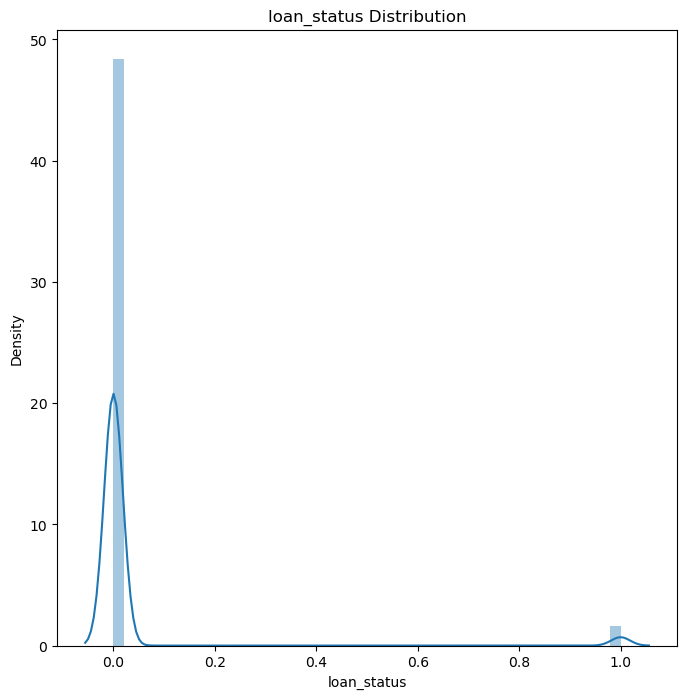

In [6]:
# distplots
numeric_vars_leadings = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status']
for var in numeric_vars_leadings:
    plt.figure(figsize=(8,8))
    sns.distplot(leading[var])
    plt.title('{} Distribution'.format(var))
    plt.show()

## Pre-Processing Data

In [7]:
# create the X and y dataset
X = leading.drop('loan_status',axis = 1)
y = leading['loan_status']


In [8]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Feature Scaling
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Predictive Modeling

### 1. Logistic Regression Model

In [9]:
# Train and Test the Model
log_reg_model = LogisticRegression().fit(X_train_scaled,y_train)
log_reg_predict = log_reg_model.predict(X_test_scaled)
print(f'Model: {type(log_reg_model).__name__}')
print(f"Training Data Score: {log_reg_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {log_reg_model.score(X_test_scaled, y_test)}")
print(f"Confusion Matrix:{confusion_matrix(y_test,log_reg_predict)} ")
print(classification_report(y_test,log_reg_predict))

Model: LogisticRegression
Training Data Score: 0.9942908240473243
Testing Data Score: 0.9936545604622369
Confusion Matrix:[[18652   113]
 [   10   609]] 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.98      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### 2. Random Forest Classifier Model

In [10]:
# Train and Test the Model
rf_model = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
rf_predict = rf_model.predict(X_test_scaled)
print(f'Model: {type(rf_model).__name__}')
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")
print(f"Confusion Matrix:{confusion_matrix(y_test,rf_predict)} ")
print(classification_report(y_test, rf_predict))

Model: RandomForestClassifier
Training Data Score: 0.9975409272252029
Testing Data Score: 0.9914878250103177
Confusion Matrix:[[18666    99]
 [   66   553]] 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.89      0.87       619

    accuracy                           0.99     19384
   macro avg       0.92      0.94      0.93     19384
weighted avg       0.99      0.99      0.99     19384



## Hyperparameter Tuning

### 1. Hypertuned Logistic Regression

In [11]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'tol': [0.0001, 0.001, 0.01]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, verbose=3)
grid_lr.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ...............C=0.001, tol=0.0001;, score=0.992 total time=   0.0s
[CV 2/5] END ...............C=0.001, tol=0.0001;, score=0.991 total time=   0.0s
[CV 3/5] END ...............C=0.001, tol=0.0001;, score=0.992 total time=   0.0s
[CV 4/5] END ...............C=0.001, tol=0.0001;, score=0.991 total time=   0.0s
[CV 5/5] END ...............C=0.001, tol=0.0001;, score=0.993 total time=   0.0s
[CV 1/5] END ................C=0.001, tol=0.001;, score=0.992 total time=   0.0s
[CV 2/5] END ................C=0.001, tol=0.001;, score=0.991 total time=   0.0s
[CV 3/5] END ................C=0.001, tol=0.001;, score=0.992 total time=   0.0s
[CV 4/5] END ................C=0.001, tol=0.001;, score=0.991 total time=   0.0s
[CV 5/5] END ................C=0.001, tol=0.001;, score=0.993 total time=   0.0s
[CV 1/5] END .................C=0.001, tol=0.01;, score=0.992 total time=   0.0s
[CV 2/5] END .................C=0.001, tol=0.01;

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'tol': [0.0001, 0.001, 0.01]},
             verbose=3)

In [12]:
# List the best parameters for this dataset
print(f"The best parameters are {grid_lr.best_params_}")
# List the best score
print(f"The best score is {grid_lr.best_score_}")
# Make predictions with the hypertuned model
grid_lr_prediction = grid_lr.predict(X_test_scaled)
print(classification_report(y_test, grid_lr_prediction))

The best parameters are {'C': 100, 'tol': 0.0001}
The best score is 0.9943080227160006
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### 2. Hypertuned Random Forest

In [14]:
param_grid_rf = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30],
    'n_estimators': [100, 200, 300]
}
grid_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_rf, verbose = 3)
grid_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END bootstrap=True, max_depth=10, n_estimators=100;, score=0.995 total time=   1.8s
[CV 2/5] END bootstrap=True, max_depth=10, n_estimators=100;, score=0.993 total time=   1.6s
[CV 3/5] END bootstrap=True, max_depth=10, n_estimators=100;, score=0.994 total time=   1.5s
[CV 4/5] END bootstrap=True, max_depth=10, n_estimators=100;, score=0.994 total time=   1.7s
[CV 5/5] END bootstrap=True, max_depth=10, n_estimators=100;, score=0.995 total time=   1.7s
[CV 1/5] END bootstrap=True, max_depth=10, n_estimators=200;, score=0.995 total time=   3.3s
[CV 2/5] END bootstrap=True, max_depth=10, n_estimators=200;, score=0.993 total time=   3.4s
[CV 3/5] END bootstrap=True, max_depth=10, n_estimators=200;, score=0.994 total time=   2.8s
[CV 4/5] END bootstrap=True, max_depth=10, n_estimators=200;, score=0.994 total time=   3.2s
[CV 5/5] END bootstrap=True, max_depth=10, n_estimators=200;, score=0.995 total time=   3.5s
[CV 1/5] 

[CV 3/5] END bootstrap=False, max_depth=30, n_estimators=300;, score=0.991 total time=   6.3s
[CV 4/5] END bootstrap=False, max_depth=30, n_estimators=300;, score=0.990 total time=   8.0s
[CV 5/5] END bootstrap=False, max_depth=30, n_estimators=300;, score=0.991 total time=   7.9s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [15]:
# List the best parameters for this dataset
print(f"The best parameters are {grid_rf.best_params_}")
# List the best score
print(f"The best score is {grid_rf.best_score_}")
# Make predictions with the hypertuned model
grid_rf_prediction = grid_rf.predict(X_test_scaled)
print(classification_report(y_test, grid_rf_prediction))

The best parameters are {'bootstrap': True, 'max_depth': 10, 'n_estimators': 100}
The best score is 0.9943768073771484
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



## Model Evaluation

In [16]:
result = [
    ["Logistic Regression", log_reg_model.score(X_test_scaled, y_test), classification_report(y_test, log_reg_predict, output_dict=True)["accuracy"]],
    ["Hypertuned Logistic Regression", grid_lr.best_score_, classification_report(y_test, grid_lr_prediction, output_dict=True)["accuracy"]],
    ["Random Forest", rf_model.score(X_test_scaled, y_test), classification_report(y_test, rf_predict, output_dict=True)["accuracy"]],
    ["Hypertuned Random Forest", grid_rf.best_score_, classification_report(y_test, grid_rf_prediction, output_dict=True)["accuracy"]]
 ]
col_names = ["Model","R^2 Score","Accuracy"]
print(tabulate(result, headers = col_names))

Model                             R^2 Score    Accuracy
------------------------------  -----------  ----------
Logistic Regression                0.993655    0.993655
Hypertuned Logistic Regression     0.994308    0.993706
Random Forest                      0.991488    0.991488
Hypertuned Random Forest           0.994377    0.993861


## Final Thoughts

Just as I predicted, the random forest performed better due to the tuning parameter. It seems like the random forest model overfitted the data at first, since the max depth was undefined at default. However, as the model was tuned, the max depth was increased to 100 and it was bootstrapped, which helped the overfitting. Hence, it had better accuracy than the logistic regression. The logistic regression model also improved when it was tuned, but it didn't improve as much as the random forest model.